In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from locus.utils.pl_utils import batch_iter
from mpl_toolkits.basemap import Basemap
from tqdm import tqdm

%matplotlib widget

In [7]:
PROJECT_ROOT = Path().cwd().parent
PROCESSED_DATA_DIR = PROJECT_ROOT / "data" / "processed"
PROCESSED_DATA_DIR

PosixPath('/home/dkenez/Projects/Locus/locus-model/data/processed')

In [8]:
df = pl.scan_parquet(PROCESSED_DATA_DIR / "LDoGI/shards/shard_0.parquet")
df = df.drop("id", "image")
print(df.head().collect())
c = df.select(pl.len()).collect()["len"][0] # count
c

shape: (5, 2)
┌────────────┬────────────┐
│ latitude   ┆ longitude  │
│ ---        ┆ ---        │
│ f64        ┆ f64        │
╞════════════╪════════════╡
│ 41.906     ┆ 12.455     │
│ 48.211072  ┆ 16.36736   │
│ 43.942876  ┆ 12.774091  │
│ 41.339055  ┆ 14.507789  │
│ -23.210269 ┆ -44.693223 │
└────────────┴────────────┘


29999

iterating over df


30it [00:00, 70.14it/s]                       


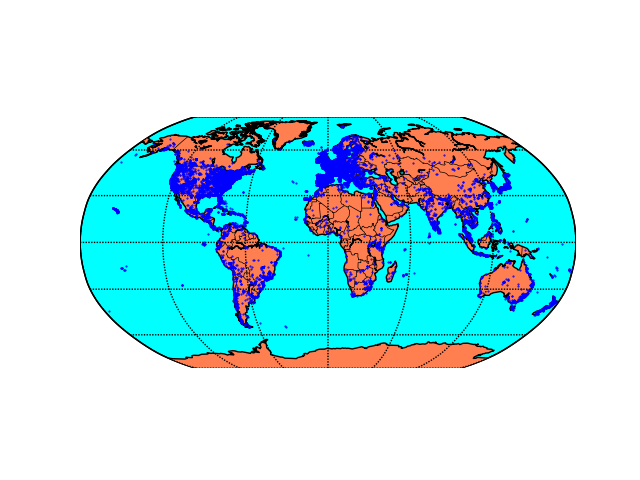

In [9]:
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
fig, ax = plt.subplots()  # a figure with a single Axes
m = Basemap(projection="robin", lon_0=0, resolution="c")

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()
# m = Basemap(projection="robin", lon_0=0, resolution="c")
m.fillcontinents(color="coral", lake_color="aqua")
# # draw parallels and meridians.
m.drawparallels(np.arange(-90.0, 120.0, 30.0))
m.drawmeridians(np.arange(0.0, 360.0, 60.0))
m.drawmapboundary(fill_color="aqua")


# iterating over df
all_rows = 0
BATCH_SIZE = 1000
print("iterating over df")
for coords in tqdm(batch_iter(df, batch_size=BATCH_SIZE), total=c//BATCH_SIZE):
    longs = coords["longitude"].to_numpy()
    lats = coords["latitude"].to_numpy()

    x, y = m(coords["longitude"], coords["latitude"])

    m.plot(x, y, "b.", markersize=1)  # plot a blue dot there



In [13]:
plt.savefig(PROJECT_ROOT / "reports/figures/draw_image_locations.png", dpi=1200)
